# Successive halving
---------------------------------

Import the boston dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#boston-dataset).
 This is a small and easy to train dataset which goal is to predict house prices.

### Load the data

In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from atom import ATOMRegressor

# Load the dataset's features and targets
dataset = load_boston()

# Convert to pd.DataFrame to get the names of the features
data = np.c_[dataset.data, dataset.target]
columns = np.append(dataset.feature_names, ["target"])
data = pd.DataFrame(data, columns=columns)
X = data.drop('target', axis=1)
y = data['target']

In [2]:
# Let's have a look at the dataset
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<<=============== ATOM ===============>>
Algorithm task: regression.


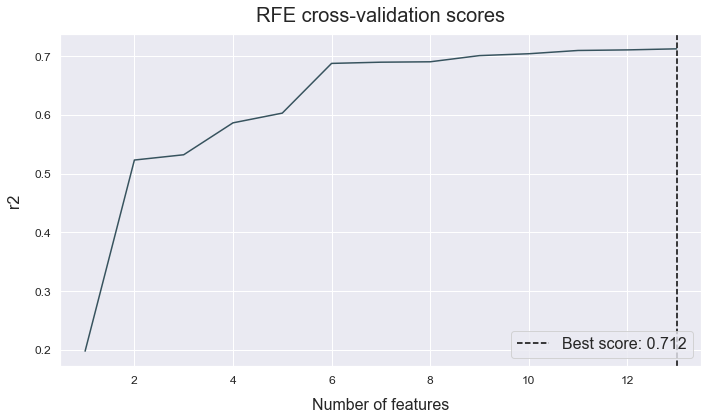

In [3]:
# Initialize ATOM
atom = ATOMRegressor(X, y, verbose=1, random_state=42)

# Select best features with the RFECV strategy
atom.feature_selection('RFECV', solver='OLS', scoring='r2')
atom.plot_RFECV()

### Run the pipeline

In [4]:
# We can compare tree-based models via successive halving
atom.successive_halving(['tree', 'bag', 'et', 'rf', 'lgb', 'catb'],
                        metric='neg_mean_squared_error',
                        max_iter=5,
                        init_points=2,
                        cv=1,
                        bagging=5)


Running pipeline =================>
Metric: neg_mean_squared_error


<<=============== Iteration 0 ==============>>
Models in pipeline: Tree, Bag, ET, RF, LGB, CatB
Percentage of data: 16.7%
Size of training set: 58
Size of test set: 26


Processing: 100%|████████████████████████████████| 6/6 [00:12<00:00,  2.04s/it]




Final results ================>>
Duration: 12.251s
Metric: neg_mean_squared_error
--------------------------------
Decision Tree     --> -49.394 ± 27.206 ~
Bagging Regressor --> -38.655 ± 3.232 ~
Extra-Trees       --> -49.144 ± 13.045 ~
Random Forest     --> -100.813 ± 101.754 ~
LightGBM          --> -31.724 ± 8.447 !! ~


<<=============== Iteration 1 ==============>>
Models in pipeline: Bag, LGB
Percentage of data: 50.0%
Size of training set: 177
Size of test set: 76


Processing: 100%|████████████████████████████████| 2/2 [00:05<00:00,  2.58s/it]




Final results ================>>
Duration: 17.454s
Metric: neg_mean_squared_error
--------------------------------
Bagging Regressor --> -27.847 ± 4.189 !! ~
LightGBM          --> -32.049 ± 6.159 ~


<<=============== Iteration 2 ==============>>
Model in pipeline: Bag
Percentage of data: 100.0%
Size of training set: 354
Size of test set: 152


Processing: 100%|████████████████████████████████| 1/1 [00:05<00:00,  5.73s/it]



Final results ================>>
Duration: 23.209s
Metric: neg_mean_squared_error
--------------------------------
Bagging Regressor --> -16.360 ± 3.548 ~


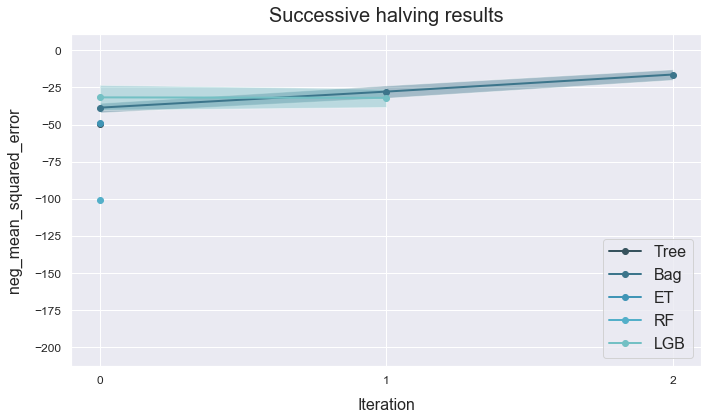

In [5]:
atom.plot_successive_halving()